# Leader board

Check out the latest challenge results here!

:::{tip}

Be sure to refresh the page to get the latest results.
:::

## Top 10 teams

Check out the evolution of the leading teams's progress!

In [1]:
# Rules of the game
MAX_GATES = 150
MAX_PARAMS = 60

# Leaderboard config
NUM_LEADERS = 10

# Helper function to compute total submission score
def compute_score(entry):
    # Accuracy 
    score = entry.Accuracy

    # Gate penalty
    score += (MAX_GATES - entry.Gates) / MAX_GATES

    # Params penalty
    score += (MAX_PARAMS - entry.Parameters) / MAX_PARAMS
    return score

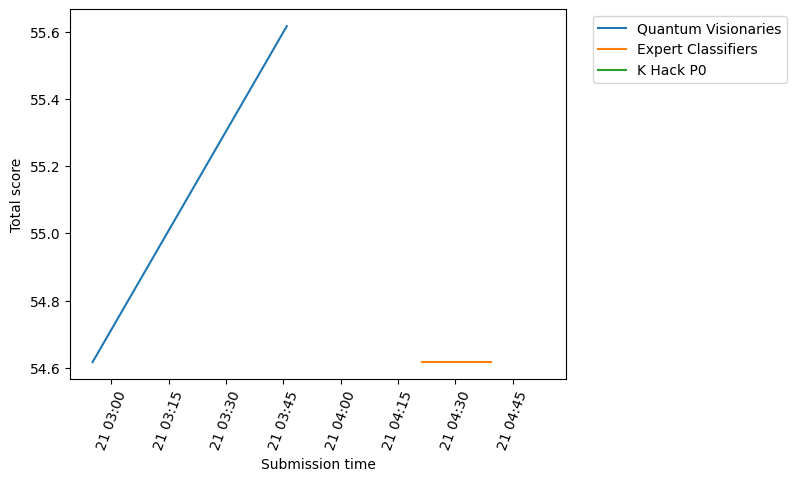

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve submissions and compute total score
results = pd.read_csv("results.csv", index_col=False)
results["Timestamp"] = pd.to_datetime(results.Timestamp, unit="s")
results.insert(1, "Score", results.apply(compute_score, axis=1))

# Get top teams, sorted by their highest scoring submission
gpby = results.groupby("Team")
top_teams = results.iloc[gpby.idxmax().Score].sort_values("Score", ascending=False)
leaders = top_teams[:NUM_LEADERS].reset_index(drop=True)

# Extract leading teams' data
agg = gpby.agg(list)
plt.xticks(rotation=70)
[plt.plot(agg.loc[team].Timestamp, agg.loc[team].Score) for team in leaders.Team]

# Make the plot pretty
plt.xlabel("Submission time")
plt.ylabel("Total score")
plt.legend(leaders.Team, bbox_to_anchor=(1.04, 1), loc="upper left");

In [3]:
leaders.rename(columns={"Score": "Top Score"})

,Team,Top Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Quantum Visionaries,55.616667,00ce1d,2024-06-21 03:45:55,54.0,10,19
1,Expert Classifiers,54.616667,276298,2024-06-21 04:21:24,53.0,10,19
2,K Hack P0,54.616667,5258e9,2024-06-21 04:53:03,53.0,10,19


## Submission history

Please find all the challenge submissions below. Most recent submissions are at the top!

In [4]:
results.sort_values("Timestamp", ascending=False).reset_index(drop=True)

,Team,Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,K Hack P0,54.616667,5258e9,2024-06-21 04:53:03,53.0,10,19
1,Expert Classifiers,54.616667,bc8257,2024-06-21 04:39:25,53.0,10,19
2,Expert Classifiers,54.616667,276298,2024-06-21 04:21:24,53.0,10,19
3,Quantum Visionaries,55.616667,00ce1d,2024-06-21 03:45:55,54.0,10,19
4,Quantum Visionaries,54.616667,3d957f,2024-06-21 02:55:06,53.0,10,19
